In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42, test_size=0.2)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(455, 30) (455,) (114, 30) (114,)


In [4]:
print(testY)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


## Bagging

In [6]:
from sklearn.ensemble import BaggingClassifier

In [41]:
bg = BaggingClassifier(base_estimator=None, n_estimators=10, n_jobs=-1, random_state=42)
bg.fit(trainX, trainY)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
         verbose=0, warm_start=False)

In [43]:
out_y = bg.predict(testX) # предсказываем классы
print(out_y)
out_score = bg.score(testX, testY) # считаем качество классификации
print('Bagging (10 tree) score:', out_score)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]
Bagging (10 tree) score: 0.956140350877193


In [44]:
bg = BaggingClassifier(base_estimator=None, n_estimators=100, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('Bagging (100 tree) score:', bg.score(testX, testY))

Bagging (100 tree) score: 0.956140350877193


In [45]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42)

In [46]:
bg = BaggingClassifier(base_estimator=clf, n_estimators=10, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('Bagging (10 svm) score:', bg.score(testX, testY))

Bagging (10 svm) score: 0.8859649122807017


In [47]:
bg = BaggingClassifier(base_estimator=clf, n_estimators=100, n_jobs=-1, random_state=42).fit(trainX, trainY)
print('Bagging (100 svm) score:', bg.score(testX, testY))

Bagging (100 svm) score: 0.9385964912280702


## AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=10, random_state=42).fit(trainX, trainY)
print('AdaBoost (10 tree) score:', ada.score(testX, testY))

AdaBoost (10 tree) score: 0.9824561403508771


Text(0, 0.5, 'Accuracy')

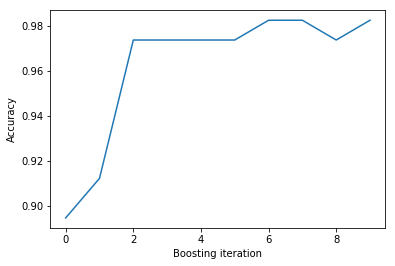

In [77]:
s_hist = list(ada.staged_score(testX, testY)) # посмотрим на историю обучения
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(s_hist)
plt.xlabel('Boosting iteration')
plt.ylabel('Accuracy')

In [60]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=42).fit(trainX, trainY)
print('AdaBoost (100 tree) score:', ada.score(testX, testY))
print("Overfit!")

AdaBoost (100 tree) score: 0.9736842105263158
Overfit!


In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='liblinear')

In [79]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=10, random_state=42).fit(trainX, trainY)
print('AdaBoost (10 logr) score:', ada.score(testX, testY))

AdaBoost (10 logr) score: 0.956140350877193


In [80]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=100, random_state=42).fit(trainX, trainY)
print('AdaBoost (100 logr) score:', ada.score(testX, testY))

AdaBoost (100 logr) score: 0.9649122807017544


In [81]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=1000, random_state=42).fit(trainX, trainY)
print('AdaBoost (1000 logr) score:', ada.score(testX, testY))

AdaBoost (1000 logr) score: 0.9649122807017544


## Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, random_state=42).fit(trainX, trainY)
print('Gradient Boosting (10 tree) score:', gb.score(testX, testY))

Gradient Boosting (10 tree) score: 0.956140350877193


In [87]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42).fit(trainX, trainY)
print('Gradient Boosting (100 tree) score:', gb.score(testX, testY))

Gradient Boosting (100 tree) score: 0.956140350877193


## XGBoost

In [90]:
!pip install xgboost

    100% |████████████████████████████████| 675kB 3.4MB/s ta 0:00:011
  Stored in directory: /Users/alex/Library/Caches/pip/wheels/5d/ea/e9/4aef52d7294badf6bc26728a73d3e001c38e07f7dc3722c5eb
Successfully built xgboost
You are using pip version 19.0.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [91]:
from xgboost import XGBClassifier

In [93]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=10, n_jobs=-1).fit(trainX, trainY)
print('XGB (10 tree) score:', xgb.score(testX, testY))

XGB (10 tree) score: 0.956140350877193


In [96]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, n_jobs=-1).fit(trainX, trainY)
print('XGB (100 tree) score:', xgb.score(testX, testY))

XGB (100 tree) score: 0.9649122807017544


In [95]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=1000, n_jobs=-1).fit(trainX, trainY)
print('XGB (1000 tree) score:', xgb.score(testX, testY))

XGB (1000 tree) score: 0.9736842105263158


In [98]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100000, n_jobs=-1).fit(trainX, trainY)
print('XGB (100000 tree) score:', xgb.score(testX, testY))

XGB (100000 tree) score: 0.9736842105263158


## CatBoost

In [102]:
!pip install catboost

    100% |████████████████████████████████| 8.0MB 1.9MB/s ta 0:00:011
You are using pip version 19.0.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [103]:
from catboost import CatBoostClassifier

In [107]:
cb = CatBoostClassifier(n_estimators=10, random_state=42).fit(trainX, trainY)
print('CB (10 tree) score:', cb.score(testX, testY))

Learning rate set to 0.5
0:	learn: 0.2269327	total: 83.9ms	remaining: 755ms
1:	learn: 0.1709999	total: 129ms	remaining: 514ms
2:	learn: 0.1230784	total: 173ms	remaining: 403ms
3:	learn: 0.0986998	total: 242ms	remaining: 363ms
4:	learn: 0.0863845	total: 287ms	remaining: 287ms
5:	learn: 0.0832428	total: 331ms	remaining: 221ms
6:	learn: 0.0744292	total: 374ms	remaining: 160ms
7:	learn: 0.0587910	total: 417ms	remaining: 104ms
8:	learn: 0.0492131	total: 473ms	remaining: 52.6ms
9:	learn: 0.0414105	total: 539ms	remaining: 0us
CB (10 tree) score: 0.9649122807017544


In [108]:
cb = CatBoostClassifier(n_estimators=100, random_state=42).fit(trainX, trainY)
print('CB (100 tree) score:', cb.score(testX, testY))

Learning rate set to 0.104314
0:	learn: 0.5347815	total: 92ms	remaining: 9.11s
1:	learn: 0.4518249	total: 138ms	remaining: 6.75s
2:	learn: 0.3641087	total: 182ms	remaining: 5.88s
3:	learn: 0.3065524	total: 251ms	remaining: 6.03s
4:	learn: 0.2526143	total: 298ms	remaining: 5.66s
5:	learn: 0.2198175	total: 341ms	remaining: 5.35s
6:	learn: 0.1959248	total: 386ms	remaining: 5.13s
7:	learn: 0.1775122	total: 428ms	remaining: 4.92s
8:	learn: 0.1605013	total: 484ms	remaining: 4.89s
9:	learn: 0.1490967	total: 543ms	remaining: 4.89s
10:	learn: 0.1379241	total: 606ms	remaining: 4.9s
11:	learn: 0.1246053	total: 654ms	remaining: 4.8s
12:	learn: 0.1143870	total: 725ms	remaining: 4.86s
13:	learn: 0.1046069	total: 775ms	remaining: 4.76s
14:	learn: 0.1008537	total: 825ms	remaining: 4.67s
15:	learn: 0.0947220	total: 876ms	remaining: 4.6s
16:	learn: 0.0898061	total: 923ms	remaining: 4.5s
17:	learn: 0.0849487	total: 977ms	remaining: 4.45s
18:	learn: 0.0819844	total: 1.02s	remaining: 4.36s
19:	learn: 0.078